# ANÁLISIS DEL PAR EUR-USD DURANTE LA CRISIS DE 2008

<img src='https://inversionesytrading.com/wp-content/uploads/2020/10/EUR-USD-exchange-rate-forecast-1.jpg'>

En este estudio vamos a analizar cómo afectó la crisis financiera de 2008 al par EUR-USD (eurodólar).

Veremos cómo llegó el precio hasta el verano de 2008, el desplome del precio, los intentos de recuperación y el retorno a la tendencia alcista en el año 2009.

**¿Qué es el eurodólar?**

Es el tipo de cambio entre euros y dólares americanos, el precio dado son los dólares que se pagan en ese momento por cada euro. 

El par EUR-USD abarca más de la mitad de todo el volumen de negociación mundial en el mercado FOREX, por lo que es un par ampliamente negociado y el más conocido de todos.

El euro es la segunda moneda de reserva así como la segunda más negociada en el mundo, por detrás del dólar estadounidense.

**Datos que vamos a utilizar**

Para realizar este análisis, vamos a utilizar un dataset público de Daria Chemkaeva, descargado de kaggle:

https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020?select=euro-daily-hist_1999_2020.csv

El dataset se actualiza periódicamente, y los datos se extraen del BCE (Banco Central Europeo). En nuestro caso, está actualizado a fecha 6 de mayo de 2021.


Antes de leer el dataset, vamos a configurar Jupyter Notebook para empezar el análisis.

## 1. Adaptación del entorno de análisis

Antes de nada, importamos las librerías que vamos a utilizar y configuramos Jupyter para que los gráficos estén centrados.

In [1]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

# Mostramos gráficos inline
%matplotlib inline

# Este código elimina un warning de pandas
pd.options.mode.chained_assignment = None 

# pandas mostrará todas las columnas si lo deseamos
pd.set_option('display.max_columns', None)

# centramos los outputs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
}
</style>
""")

## 2. Primeras lecturas del dataset

Vamos a convertir el dataset en un dataframe con pandas, al que llamaremos *euro*, y mostraremos las cinco primeras y últimas filas para echar un primer vistazo. También mostraremos la información del dataframe, donde veremos sus columnas.

In [2]:
euro = pd.read_csv('euro-daily.csv')

In [3]:
# Mostramos las cinco primeras líneas
euro.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,NaN,0.86708,NaN,9.3685,7.5335,358.18,17246.34,3.9312,88.9405,150.9,131.69,1352.78,NaN,NaN,NaN,24.4195,4.9711,10.0558,1.6715,57.845,4.5868,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,NaN,0.86274,NaN,9.3267,7.5315,359.65,17313.31,3.9212,88.6925,150.8,131.20,1350.98,NaN,NaN,NaN,24.2675,4.9431,9.9848,1.6683,57.658,4.5778,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,NaN,0.86770,NaN,9.3374,7.5408,360.31,17395.47,3.9097,88.8140,148.8,131.26,1353.56,NaN,NaN,NaN,24.4040,4.9563,10.0123,1.6887,57.787,4.5584,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,NaN,0.86838,NaN,9.3554,7.5433,359.94,17374.55,3.9053,88.9960,151.0,131.90,1351.95,NaN,NaN,NaN,24.4071,4.9432,10.0160,1.6786,58.081,4.5518,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,NaN,0.86863,NaN,9.3816,7.5465,359.86,17424.24,3.9199,89.4795,149.6,131.62,1346.24,NaN,NaN,NaN,24.2345,4.9482,9.9533,1.6738,58.286,4.5635,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875


In [4]:
# Mostramos las cinco últimas líneas
euro.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5776,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5777,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5778,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5779,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5780,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
# Información del dataset
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

## 3. Data Cleaning

Antes de empezar a realizar análisis, debemos preparar el dataset. Lo primero que haremos será lo siguiente:

- Utilizaremos un nuevo dataset que solo contendrá la información del tipo de cambio EUR-USD.
- Como nos centraremos solamente en el dólar estadounidense, vamos a cambiar el nombre de esta columna para facilitar las lecturas y los análisis. 
- Además, cambiaremos el formato de las fechas del dataframe a objeto datetime, y las ordenaremos por antigüedad.
- Depuraremos otros detalles que nos podamos encontrar en el proceso.

In [6]:
# Renombramos las columnas que nos interesan
euro.rename(columns={'[US dollar ]': 'USD', 
                     'Period\\Unit:': 'Fecha'},
                      inplace=True)
# Cambiamos las fechas a tipo datetime
euro['Fecha'] = pd.to_datetime(euro['Fecha'])
# Ordenamos las fechas
euro.sort_values('Fecha', inplace=True)
euro.reset_index(drop=True, inplace=True)

In [7]:
# Nombramos nuestro dataset EUR-USD
eur_usd = euro[['Fecha','USD']]

Vamos a ver los valores de la columna 'USD'

In [8]:
eur_usd['USD'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
0.9386     1
1.1309     1
1.2949     1
1.4867     1
0.8891     1
Name: USD, Length: 3549, dtype: int64

Podemos observar que hay 62 valores que no contienen tipo de cambio, sino que contienen un guión '-'. Vamos a eliminar estas filas.

In [9]:
# Eliminamos las filas y volvemos a mostrar los valores para corroborarlo
eur_usd = eur_usd.drop(eur_usd[eur_usd['USD'] == '-'].index)
eur_usd['USD'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.3086    6
1.3373    6
         ..
0.9386    1
1.1309    1
1.2949    1
1.4867    1
0.8891    1
Name: USD, Length: 3548, dtype: int64

Si atendemos a la información que mostramos del dataset, vemos que los valores de 'USD' no son tipo float, por lo que vamos a cambiarlos ahora:

In [10]:
# Cambiamos los valores de la columna USD a tipo float
eur_usd['USD'] = eur_usd['USD'].astype(float)

Vamos a mostrar como hemos dejado el dataset.

In [11]:
eur_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   5719 non-null   datetime64[ns]
 1   USD     5719 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


Ya tenemos el dataset listo para trabajar con él. Vamos a empezar con unos análisis básicos.

## 4. Primeras visualizaciones del par EUR-USD

Vamos a mostrar la evolución del par desde 1999:

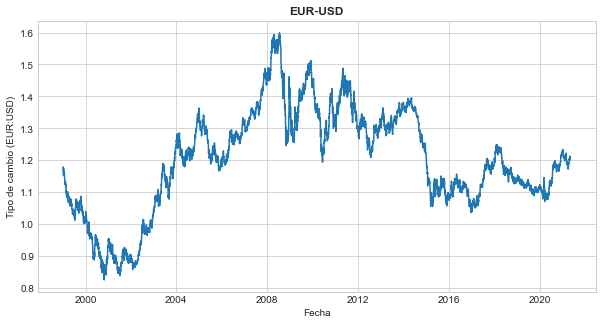

In [12]:
style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.plot(eur_usd['Fecha'], eur_usd['USD'])
plt.title('EUR-USD', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

In [13]:
# Mínimo histórico del EUR-USD
eur_usd['USD'].min()

0.8252

In [14]:
# Máximo histórico del EUR-USD
eur_usd['USD'].max()

1.599

In [15]:
maximo = eur_usd.loc[(eur_usd['USD'] == 1.599)]

In [16]:
minimo = eur_usd.loc[(eur_usd['USD'] == 0.8252)]

In [17]:
# Fechas en las que tuvieron lugar el máximo y el mínimo
print(maximo['Fecha'])
print(minimo['Fecha'])

2486   2008-07-15
Name: Fecha, dtype: datetime64[ns]
473   2000-10-26
Name: Fecha, dtype: datetime64[ns]


Podemos ver con cierta claridad las variaciones que ha tenido el par en su historia. En 2000 estuvo por debajo de 0.85 USD, y a partir de ahí tuvo un periodo de seis/siete años de fuerte tendencia alcista, hasta tocar los 1.6 USD. A partir de entonces, la tendencia es bajista (aunque es cierto que no tiene la misma fuerza que el periodo alcista).

Los máximos son cada vez menores, y en el momento de realizar este análisis, está a punto de tocar el máximo anterior. 

De acuerdo a nuestro dataset, el tipo de cambio mínimo registrado fue de 0.8252 USD el día 26 de octubre de 2000, y el máximo de 1.599 USD el 15 de julio de 2008.

### 4.1. Media móvil

El gráfico histórico del EUR-USD que acabamos de mostrar muestra muchos "tambaleos" o líneas hacia arriba y hacia abajo, fruto de las variaciones diarias del precio del par.

Para hacer los gráficos más visuales, vamos a crear una nueva columna en el dataset que sea la media móvil de 30 días. Esto hará que el gráfico se vea más fluido. La media móvil la calculamos directamente con pandas.

In [18]:
# Con el método 'rolling' de pandas calculamos la media móvil; recibe el periodo por parámetro 
eur_usd['med30'] = eur_usd['USD'].rolling(30).mean()

In [19]:
eur_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   5719 non-null   datetime64[ns]
 1   USD     5719 non-null   float64       
 2   med30   5690 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 178.7 KB


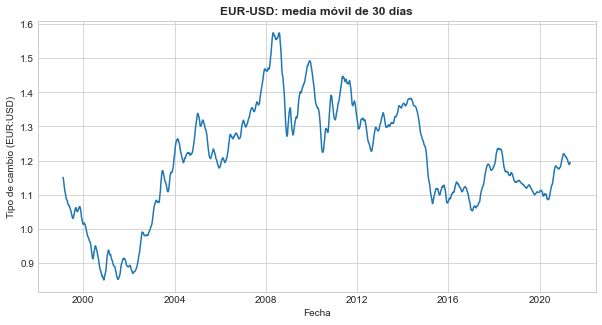

In [20]:
plt.figure(figsize=(10,5))
plt.plot(eur_usd['Fecha'], eur_usd['med30'])
plt.title('EUR-USD: media móvil de 30 días', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

## 5. Evolución del precio durante la crisis financiera de 2008

<img src='https://i.guim.co.uk/img/media/04c1ff101304b7de0c6346257a4ab7996497cdf8/0_124_4148_2488/master/4148.jpg?width=1200&quality=85&auto=format&fit=max&s=ef1579b6e7fdcb30abe82ca8dcb92470'>

En septiembre de 2008, se profundizó la peor crisis económica global de las últimas décadas cuando Estados Unidos nacionalizó los gigantes hipotecarios Freddie Mac y Fannie Mae.

Ambas instituciones se hundieron por la crisis desatada en el sector inmobiliario estadounidense, en particular las hipotecas tipo subprime o “hipotecas basura” en 2007 y que se extendió por todo el mundo.

Vamos a estudiar la evolución del eurodólar durante la crisis financiera de 2008. Veremos las reacciones del precio durante las fechas clave de la crisis.


**7 de septiembre - 3 de octubre de 2008**

- EE.UU. nacionaliza ambos gigantes para prevenir para prevenir el colapso del mercado hipotecario en el país. Se trata del rescate financiero más grande en la historia de EE.UU.
- El banco de inversiones se declara en bancarrota luego de que el gobierno se negara a salir al rescate. El Bank of America compra Merrill Lynch.
- El presidente de Estados Unidos, George W. Bush, promulga la ley del controvertido paquete de rescate de USD700.000 millones, después de que el Congreso aprobara una nueva versión del plan.

**12 de diciembre de 2008: Estafa del siglo**

Se descubre una estafa por valor de unos USD50.000 millones del financiero estadounidense Bernard Madoff, presidente de la firma de inversión que lleva su nombre y quien llegó a presidir el índice Nasdaq de Nueva York.

**9 de marzo de 2009: Mercados reaccionan**

Los principales mercados financieros en Estados Unidos y Europa reaccionan positivamente a las medidas de emergencia adoptados por los gobiernos. El Dow Jones comienza a recobrarse.

**13 de agosto de 2009: Grandes economías salen del agujero**

Francia y Alemania, dos de las mayores economías europeas anuncian un crecimiento positivo entre abril y junio, poniendo punto y final a la recesión. Cuatro días después Japón hace el mismo anuncio.


*Fuente: BBC World*

### 5.1. ¿Cómo llega el dólar a 2008?

Vamos a mostrar un gráfico de los tres años anteriores al verano de 2008, para visualizar la evolución del precio del par hasta ese momento:

In [21]:
# Array booleano del periodo indicado
mask = (eur_usd['Fecha'] >= '2005-1-1') & (eur_usd['Fecha'] <= '2008-7-1')

In [22]:
# dataframe del periodo 2005-2008
al2008 = eur_usd.loc[mask]

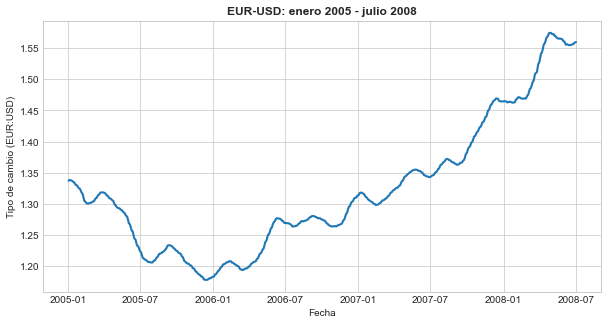

In [23]:
# Mostramos un gráfico sencillo
plt.figure(figsize=(10,5))
plt.plot(al2008['Fecha'], al2008['med30'],linewidth=2.1)
plt.title('EUR-USD: enero 2005 - julio 2008', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

El precio del EUR-USD venía en una clara tendencia alcista desde 2006, habiendo tenido fuertes subidas especialmente los doce meses anteriores al verano de 2008.

### 5.2. Desplome del precio: periodo del 1 de agosto de 2008 al 31 de octubre de 2008

Vamos a mostrar el periodo entre el 1 de agosto de y el 31 de octubre de 2008, ya que se producen eventos económicos críticos:

In [24]:
# Array booleano
ago_oct_08_bool = (eur_usd['Fecha'] >= '2008-8-1') & (eur_usd['Fecha'] <= '2008-10-31')

In [25]:
# Dataframe
ago_oct_08 = eur_usd.loc[ago_oct_08_bool]

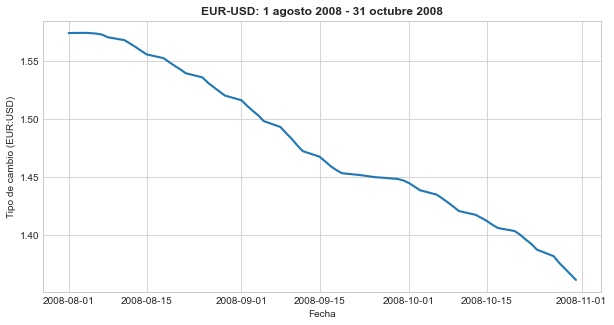

In [26]:
# Mostramos el gráfico
plt.figure(figsize=(10,5))
plt.plot(ago_oct_08['Fecha'], ago_oct_08['med30'],linewidth=2.1)
plt.title('EUR-USD: 1 agosto 2008 - 31 octubre 2008', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

El precio del par se desploma en cuestión de noventa días debido al pánico financiero.

El precio pasa de casi USD1.60 a USD1.35. 

### 5.3. Precio del EUR-USD entre el 1 de noviembre de 2008 - 31 diciembre de 2008

In [27]:
# Array booleano
nov_dic_08_bool = (eur_usd['Fecha'] >= '2008-11-1') & (eur_usd['Fecha'] <= '2008-12-31')

In [28]:
# Dataframe
nov_dic_08 = eur_usd.loc[nov_dic_08_bool]

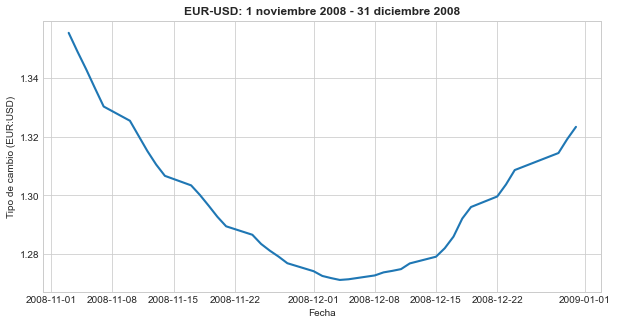

In [29]:
# Mostramos el gráfico
plt.figure(figsize=(10,5))
plt.plot(nov_dic_08['Fecha'], nov_dic_08['med30'],linewidth=2.1)
plt.title('EUR-USD: 1 noviembre 2008 - 31 diciembre 2008', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

El precio sigue cayendo durante el mes de noviembre, y a mediados de diciembre hace un primer intento de recuperación desde los USD1.28.

### 5.4. Precio del EUR-USD entre el 1 de enero de 2009 - 31 marzo de 2009

In [30]:
# Array booleano
ene_mar_09_bool = (eur_usd['Fecha'] >= '2009-1-1') & (eur_usd['Fecha'] <= '2009-3-31')

In [31]:
# Dataframe
ene_mar_09 = eur_usd.loc[ene_mar_09_bool]

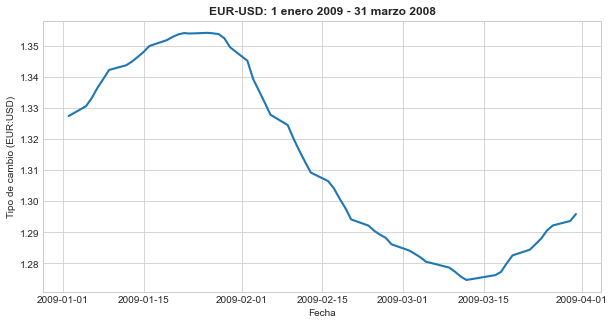

In [32]:
# Mostramos el gráfico
plt.figure(figsize=(10,5))
plt.plot(ene_mar_09['Fecha'], ene_mar_09['med30'],linewidth=2.1)
plt.title('EUR-USD: 1 enero 2009 - 31 marzo 2008', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

Vemos como falla el primer intento de recuperación del precio, volviendo a caer en febrero, y vuelve a intentar un repunte caundo baja (de nuevo) de los USD1.28, en marzo de 2009.

### 5.5. Recuperación. Periodo del 1 de abril de 2009 - 31 agosto de 2009

In [33]:
# Array booleano
abr_ago_09_bool = (eur_usd['Fecha'] >= '2009-4-1') & (eur_usd['Fecha'] <= '2009-8-31')

In [34]:
# Dataframe
abr_ago_09 = eur_usd.loc[abr_ago_09_bool]

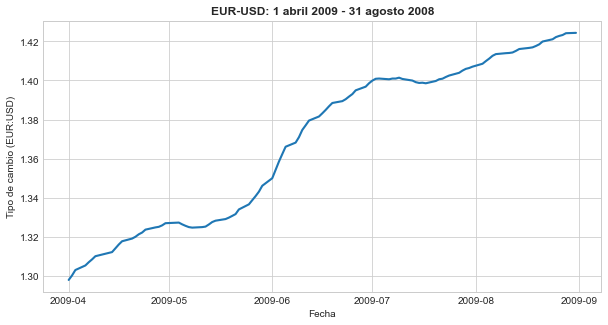

In [35]:
# Mostramos el gráfico
plt.figure(figsize=(10,5))
plt.plot(abr_ago_09['Fecha'], abr_ago_09['med30'],linewidth=2.1)
plt.title('EUR-USD: 1 abril 2009 - 31 agosto 2008', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

El precio en este periodo sí tiene una clara tendencia al alza. Recupera en tres meses los USD1.40, y sigue subiendo a lo largo del verano de 2009.

### 5.6. Crisis Financiera de 2008: Cronología gráfica

Vamos a mostrar una cronología visual de todo el periodo:

In [36]:
# Creamos un array booleano
ago08_sep09_bool = (eur_usd['Fecha'] >= '2008-8-1') & (eur_usd['Fecha'] <= '2009-8-31')

In [37]:
# Periodo completo
ago08_sep09 = eur_usd.loc[ago08_sep09_bool]

In [38]:
# Tramo 1: 1ago08-31oct08
ago_oct_08_b = (ago08_sep09['Fecha'] >= '2008-8-1') & (ago08_sep09['Fecha'] <= '2008-10-31')
ago_oct_08 = ago08_sep09.loc[ago_oct_08_b]

In [39]:
# Tramo 2: 1nov08-31dic08
nov_dic_08_b = (ago08_sep09['Fecha'] >= '2008-11-1') & (ago08_sep09['Fecha'] <= '2008-12-31')
nov_dic_08 = ago08_sep09.loc[nov_dic_08_b]

In [40]:
# Tramo 3: 1ene08-31mar08
ene_mar_09_b = (ago08_sep09['Fecha'] >= '2009-1-1') & (ago08_sep09['Fecha'] <= '2009-3-31')
ene_mar_09 = ago08_sep09.loc[ene_mar_09_b]

In [41]:
# Tramo 4: 1abr08-31ago08
abr_ago_09_b = (ago08_sep09['Fecha'] >= '2009-4-1') & (ago08_sep09['Fecha'] <= '2009-8-31')
abr_ago_09 = ago08_sep09.loc[abr_ago_09_b]

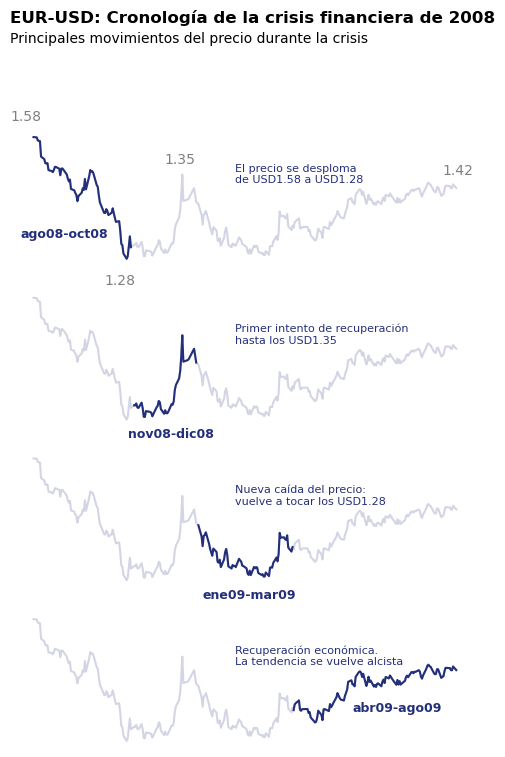

In [42]:
style.use('default')
# Figura principal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

# Configuración de los axes
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(ago08_sep09['Fecha'], ago08_sep09['USD'],
            color='#232F7A', alpha=0.2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    spines = ['top','right','bottom','left']
    for spine in spines:
        ax.spines[spine].set_visible(False)
   

# Título
ax1.text(14070, 1.85, 'EUR-USD: Cronología de la crisis financiera de 2008', weight='bold', size=12)
# Subtítulo
ax1.text(14070, 1.8, 'Principales movimientos del precio durante la crisis', size=10)        

# Líneas destacadas
ax1.plot(ago_oct_08['Fecha'], ago_oct_08['USD'],
         color='#232F7A', linewidth=1.5)
ax2.plot(nov_dic_08['Fecha'], nov_dic_08['USD'],
         color='#232F7A', linewidth=1.5)
ax3.plot(ene_mar_09['Fecha'], ene_mar_09['USD'],
         color='#232F7A', linewidth=1.5)
ax4.plot(abr_ago_09['Fecha'], abr_ago_09['USD'],
         color='#232F7A', linewidth=1.5)

# Labels precios USD
ax1.text(14070, 1.6, '1.58', alpha=0.5)
ax1.text(14158, 1.18, '1.28', alpha=0.5)
ax1.text(14214, 1.49, '1.35', alpha=0.5)
ax1.text(14474, 1.46, '1.42', alpha=0.5)

# TEXTOS BAJO LOS GRÁFICOS:
# Texto ax1
ax1.text(14080, 1.3, 'ago08-oct08', weight='bold', size=9, color='#232F7A')
# Texto ax2
ax2.text(14180, 1.2, 'nov08-dic08', weight='bold', size=9, color='#232F7A')
# Texto ax3
ax3.text(14250, 1.2, 'ene09-mar09', weight='bold', size=9, color='#232F7A')
# Texto ax4
ax4.text(14390, 1.32, 'abr09-ago09', weight='bold', size=9, color='#232F7A')

# TEXTOS EXPLICATORIOS
# Texto ax1
ax1.text(14280, 1.44, 'El precio se desploma\nde USD1.58 a USD1.28', size=8, color='#232F7A')
# Texto ax2
ax2.text(14280, 1.44, 'Primer intento de recuperación\nhasta los USD1.35', size=8, color='#232F7A')
# Texto ax3
ax3.text(14280, 1.44, 'Nueva caída del precio:\nvuelve a tocar los USD1.28', size=8, color='#232F7A')
# Texto ax4
ax4.text(14280, 1.44, 'Recuperación económica.\nLa tendencia se vuelve alcista', size=8, color='#232F7A')

plt.show()      

## 6. Precio del EUR-USD durante los mandatos de Bush, Obama y Trump

Vamos a ver ahora la evolución del par durante los mandatos de George Bush, Barack Obama y Donald Trump.

### 6.1. Mandato de George W. Bush (20 de enero de 2001-20 de enero de 2009)

<img src='https://cdn.britannica.com/s:800x450,c:crop/42/172742-138-B0830C03/overview-George-W-Bush.jpg'>

Vamos a crear un dataframe que abarque el periodo del mandato de George W. Bush, 43º Presidente de los EEUU, entre el 20 de enero de 2001 y el 20 de enero de 2009:

In [43]:
# Array booleano: periodo del mandato de Bush
bush_bool = (eur_usd['Fecha'] >= '2001-1-20') & (eur_usd['Fecha'] <= '2009-1-20')

In [44]:
# Dataframe: periodo del mandato de Bush
bush = eur_usd.loc[bush_bool]

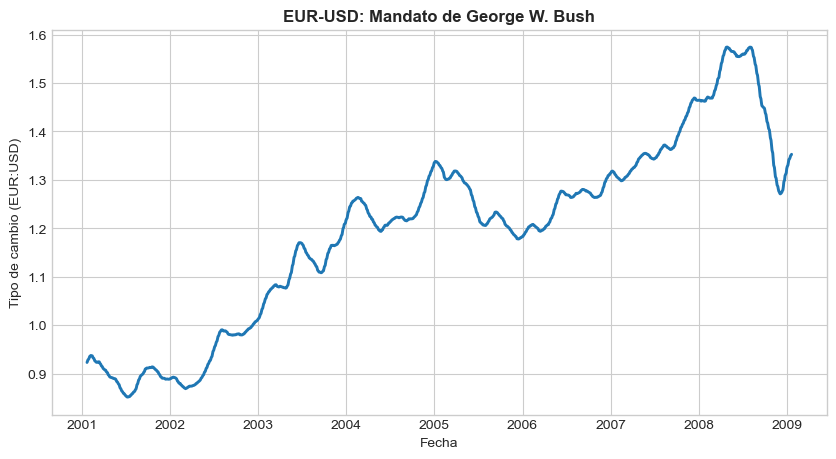

In [45]:
# Mostramos el gráfico
style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.plot(bush['Fecha'], bush['med30'],linewidth=2.1)
plt.title('EUR-USD: Mandato de George W. Bush', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

In [46]:
inicio_bush = bush.head(1)
inicio_bush

,Fecha,USD,med30
535,2001-01-22,0.929,0.92291


In [47]:
fin_bush = bush.tail(1)
fin_bush

,Fecha,USD,med30
2621,2009-01-20,1.293,1.352873


**Durante el mandato de George W. Bush:**
- El precio del par al inicio del mandato era de **USD0.929.**
- El precio del par al finalizar el mandato fue de **USD1.293.**
- El par EUR-USD subió **USD0.364** durante el mandato de George W. Bush.

### 6.2. Mandato de Barack Obama (20 de enero de 2009-20 de enero de 2017)

<img src='https://arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/7QM6U5VMIFDRNBPNOCH7JZWWY4.jpg'>

Barack Obama fue el 44º Presidente de los EEUU, entre el 20 de enero de 2009 y el 20 de enero de 2017.

In [48]:
# Array booleano: periodo del mandato de Obama
obama_bool = (eur_usd['Fecha'] >= '2009-1-20') & (eur_usd['Fecha'] <= '2017-1-20')

In [49]:
# Dataframe: periodo del mandato de Obama
obama = eur_usd.loc[obama_bool]

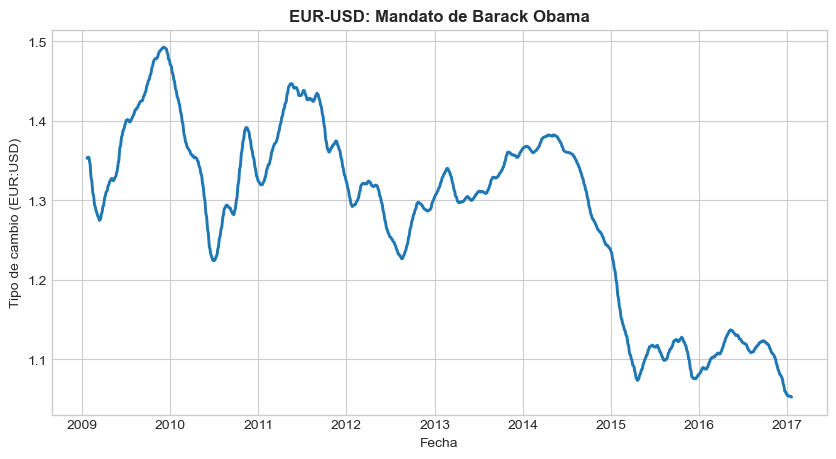

In [50]:
# Mostramos el gráfico
style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.plot(obama['Fecha'], obama['med30'],linewidth=2.1)
plt.title('EUR-USD: Mandato de Barack Obama', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

In [51]:
inicio_obama = obama.head(1)
inicio_obama

,Fecha,USD,med30
2621,2009-01-20,1.293,1.352873


In [52]:
fin_obama = obama.tail(1)
fin_obama

,Fecha,USD,med30
4686,2017-01-20,1.0632,1.052497


**Durante el mandato de Barack Obama:**
- El precio del par al inicio del mandato era de **USD1.293.**
- El precio del par al finalizar el mandato fue de **USD1.063.**
- El par EUR-USD bajó **USD0.23** durante el mandato de Barack Obama.

### 6.3. Mandato de Donald Trump (20 de enero de 2017-20 de enero de 2021)

<img src='https://www.semana.com/resizer/CmimaHNDWZBOAto74Hsj3Lwee2U=/1200x675/filters:format(jpg):quality(50)//cloudfront-us-east-1.images.arcpublishing.com/semana/V3Z6XEG4KRC2XAVV4LTOPRFCG4.jpg'>

Donald Trump fue el 45º Presidente de los EEUU, entre el 20 de enero de 2017 y el 20 de enero de 2021.

In [53]:
# Array booleano: periodo del mandato de Trump
trump_bool = (eur_usd['Fecha'] >= '2017-1-20') & (eur_usd['Fecha'] <= '2021-1-20')

In [54]:
# Dataframe: periodo del mandato de Trump
trump = eur_usd.loc[trump_bool]

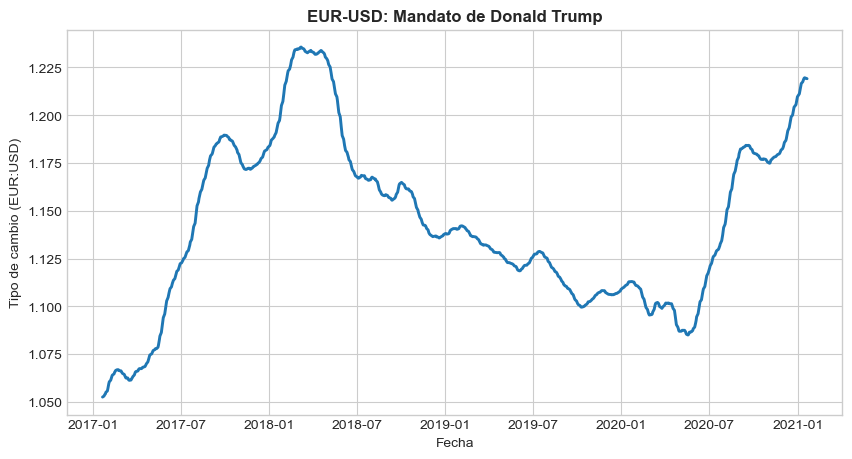

In [55]:
# Mostramos el gráfico
style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.plot(trump['Fecha'], trump['med30'],linewidth=2.1)
plt.title('EUR-USD: Mandato de Donald Trump', weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio (EUR:USD)')
plt.show()

In [56]:
inicio_trump = trump.head(1)
inicio_trump

,Fecha,USD,med30
4686,2017-01-20,1.0632,1.052497


In [57]:
fin_trump = trump.tail(1)
fin_trump

,Fecha,USD,med30
5706,2021-01-20,1.2101,1.21909


**Durante el mandato de Donald Trump:**
- El precio del par al inicio del mandato era de **USD1.063.**
- El precio del par al finalizar el mandato fue de **USD1.210.**
- El par EUR-USD subió **USD0.147** durante el mandato de Donald Trump.

## 7. Conclusiones

#### CRISIS DE 2008

La crisis de 2008 golpeó el precio del par EUR-USD. Antes de que estallase, el par alcanzó el máximo histórico (que aún no se ha superado) de USD1.60, y se desplomó en pocas semanas.

Hemos visto que durante el año siguiente al desplome de septiembre de 2008, hubo cuatro estados del precio:
- Desplome del precio
- Primer intento de repunte (fallido)
- Nueva caída del precio hasta el soporte anterior
- Nueva tendencia al alza

#### PRECIO DEL EUR-USD EN LOS MANDATOS DE BUSH, OBAMA Y TRUMP

Hemos analizado la evolución del par durante los mandatos de los tres presidentes. Los datos son los siguientes:

- **Durante el mandato de George W. Bush:**
    - El precio del par al inicio del mandato era de USD0.929.
    - El precio del par al finalizar el mandato fue de USD1.293.
    - El par EUR-USD subió USD0.364.
    
- **Durante el mandato de Barack Obama:**
    - El precio del par al inicio del mandato era de USD1.293.
    - El precio del par al finalizar el mandato fue de USD1.063.
    - El par EUR-USD bajó USD0.23.
    
- **Durante el mandato de Donald Trump:**
    - El precio del par al inicio del mandato era de USD1.063.
    - El precio del par al finalizar el mandato fue de USD1.210.
    - El par EUR-USD subió USD0.147.